In [10]:
import numpy as np
from keras.datasets import mnist
from keras.models import load_model
from keras.utils import to_categorical
from keras import backend as K
import tensorflow as tf

# Load the MNIST dataset
(_, _), (x_test, y_test) = mnist.load_data()
accu=[]
# Preprocess the data
x_test = x_test[:784].astype('float32') / 255.
y_test = x_test[:784].astype('float32') / 255.
print("shape", y_test.shape)
# Load the target model (black box)
model = load_model('mnist_gan_generator.h5')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Define the black box attack function
def black_box_attack(x_test, y_test, model):
    epsilon = 0.1  # Perturbation size
    #x_adv = np.zeros_like(28,28)
    x_adv = np.empty((10000, 1, 100))



    print("xtest shape",x_test.shape)
    print("x_adv shape",x_adv.shape)

    for i in range(len(x_test)):
        print("x_test no:",i,"/",len(x_test))
        # Generate adversarial example
        x = x_test[i]
        y_true = y_test[i]
        noise = np.random.normal(0, 1, (1, 100))
        
        print("noise shape",noise.shape)
        generated_image = model.predict(noise)
        print("generated_image shape",generated_image.shape)
        generated_image = generated_image.reshape((1, 28*28))
        generated_image = generated_image[:,:100]
        print("updated generated_image shape",generated_image.shape)
        #generated_image = generated_image.reshape((28, 28, 1)) # reshape to match the input shape of the target model
        generated_image = np.clip(generated_image, 0, 1) # clip the values to [0, 1]
        test=model.predict(generated_image)
        y_pred_label = np.argmax(test)

        if y_pred_label == np.argmax(y_true):
            # If the prediction is correct, add perturbation
            print("prediction is correct")
            #perturbation = np.sign(model.gradient(np.array([generated_image]), np.array([y_true]))) * epsilon
            #x_adv[i] = np.clip(generated_image + perturbation, 0, 1)
            
            with tf.GradientTape() as tape:
                generated_image_tensor = tf.convert_to_tensor(generated_image)
                tape.watch(generated_image_tensor)
                print(generated_image_tensor.shape)
                #generated_image_tensor= generated_image_tensor.numpy().reshape((1, 28*28))
                #generated_image_tensor =tf.convert_to_tensor(generated_image_tensor[:,:100])
                tape.watch(generated_image_tensor)
                y_pred = model(generated_image_tensor)
                y_true = tf.expand_dims(y_true, axis=0) # add an extra dimension to match the shape of y_pred
                #y_true=tf.expand_dims(y_true, axis=-1)
                loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
                #print("loss",loss)
                #print("gradient", tf.convert_to_tensor(generated_image_tensor))
            gradients = tape.gradient(loss, generated_image_tensor)
            #print("gradient", gradients)
            perturbation = 0.01 * tf.sign(gradients)
            generated_image = generated_image + perturbation.numpy()
            x_adv[i]= generated_image
            
            
        else:
            print("prediction is not correct")
            print("generated_image shape",generated_image.shape)
            print("x_adv shape",x_adv.shape)
            x_adv[i] = generated_image
            print("abc",x_adv[i].shape)
            y_test = np.reshape(y_test[:784], (-1, 28, 28, 1))
            print("xyz",y_test[i][np.newaxis, ...].shape)
            loss, acc = model.evaluate(x_adv[i], y_test[i][np.newaxis, ...])
            print('Target model accuracy on the adversarial examples:', acc)
            accu.append(acc)
            
    return accu

#print("xtestshape",x_test.shape)
#print("y_test",y_test.shape)
# Generate the adversarial examples
accur= black_box_attack(x_test, y_test, model)

shape (784, 28, 28)


xtest shape (784, 28, 28)
x_adv shape (10000, 1, 100)
x_test no: 0 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 177ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 1s 530ms/step - loss: 4.3152e-11 - accuracy: 0.7181
Target model accuracy on the adversarial examples: 0.7181122303009033
x_test no: 1 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 50ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 57ms/step - loss: 6.7462e-11 - accuracy: 0.6811
Target model accurac

1/1 [==============================] - 0s 48ms/step
prediction is correct
(1, 100)
x_test no: 17 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 43ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 5.3006e-11 - accuracy: 0.7079
Target model accuracy on the adversarial examples: 0.7079081535339355
x_test no: 18 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 8.2856e-11 - accuracy

1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 61ms/step - loss: 5.7430e-11 - accuracy: 0.6709
Target model accuracy on the adversarial examples: 0.670918345451355
x_test no: 34 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 52ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 57ms/step - loss: 6.1452e-11 - accuracy: 0.7092
Target model accuracy on the adversarial examples: 0.7091836929321289
x_test no: 35 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [

1/1 [==============================] - 0s 56ms/step - loss: 5.5910e-11 - accuracy: 0.7015
Target model accuracy on the adversarial examples: 0.7015306353569031
x_test no: 50 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 4.7151e-11 - accuracy: 0.7347
Target model accuracy on the adversarial examples: 0.7346938848495483
x_test no: 51 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 52ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 

1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 41ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 5.5642e-11 - accuracy: 0.6990
Target model accuracy on the adversarial examples: 0.6989796161651611
x_test no: 67 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 52ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 5.1751e-11 - accuracy: 0.7015
Target model accuracy on the adversarial examples: 0.7015306353569031
x_test no: 68 / 784
noise shape (1, 100)
1/1 

1/1 [==============================] - 0s 56ms/step - loss: 7.8639e-11 - accuracy: 0.6773
Target model accuracy on the adversarial examples: 0.6772959232330322
x_test no: 83 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 40ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 55ms/step - loss: 4.1955e-11 - accuracy: 0.7334
Target model accuracy on the adversarial examples: 0.733418345451355
x_test no: 84 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 49ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [

1/1 [==============================] - 0s 40ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 42ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 7.1683e-11 - accuracy: 0.6939
Target model accuracy on the adversarial examples: 0.6938775777816772
x_test no: 100 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 40ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 41ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 4.2488e-11 - accuracy: 0.7015
Target model accuracy on the adversarial examples: 0.7015306353569031
x_test no: 101 / 784
noise shape (1, 100)
1/

1/1 [==============================] - 0s 49ms/step - loss: 4.0038e-11 - accuracy: 0.7449
Target model accuracy on the adversarial examples: 0.7448979616165161
x_test no: 116 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 40ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 43ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 57ms/step - loss: 3.5136e-11 - accuracy: 0.7526
Target model accuracy on the adversarial examples: 0.7525510191917419
x_test no: 117 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 56ms/step - loss: 8.4404e-11 - accuracy: 0.6964
Target model accuracy on the adversarial examples: 0.6964285969734192
x_test no: 133 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 56ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 57ms/step - loss: 7.4947e-11 - accuracy: 0.7015
Target model accuracy on the adversarial examples: 0.7015306353569031
x_test no: 134 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 49ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 59ms/step - loss: 3.9357e-11 - accuracy: 0.7117
Target model accuracy on the adversarial examples: 0.7117347121238708
x_test no: 150 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 51ms/step - loss: 5.4648e-11 - accuracy: 0.7207
Target model accuracy on the adversarial examples: 0.7206632494926453
x_test no: 151 / 784
noise shape (1, 100)
1/

1/1 [==============================] - 0s 48ms/step - loss: 7.2768e-11 - accuracy: 0.6849
Target model accuracy on the adversarial examples: 0.6849489808082581
x_test no: 166 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 5.0577e-11 - accuracy: 0.7156
Target model accuracy on the adversarial examples: 0.7155612111091614
x_test no: 167 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 49ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 43ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 56ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 4.2067e-11 - accuracy: 0.7398
Target model accuracy on the adversarial examples: 0.7397959232330322
x_test no: 183 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 40ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 53ms/step - loss: 8.6938e-11 - accuracy: 0.6582
Target model accuracy on the adversarial examples: 0.6581632494926453
x_test no: 184 / 784
noise shape (1, 100)
1/

1/1 [==============================] - 0s 48ms/step - loss: 4.4347e-11 - accuracy: 0.7385
Target model accuracy on the adversarial examples: 0.7385203838348389
x_test no: 199 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 46ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 8.8828e-11 - accuracy: 0.6913
Target model accuracy on the adversarial examples: 0.6913265585899353
x_test no: 200 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 46ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 56ms/step - loss: 7.4491e-11 - accuracy: 0.7130
Target model accuracy on the adversarial examples: 0.7130101919174194
x_test no: 216 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 57ms/step - loss: 5.7166e-11 - accuracy: 0.7194
Target model accuracy on the adversarial examples: 0.7193877696990967
x_test no: 217 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 40ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 64ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 45ms/step - loss: 7.0369e-11 - accuracy: 0.7092
Target model accuracy on the adversarial examples: 0.7091836929321289
x_test no: 233 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 40ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 65ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 54ms/step - loss: 7.7634e-11 - accuracy: 0.6888
Target model accuracy on the adversarial examples: 0.6887755393981934
x_test no: 234 / 784
noise shape (1, 100)
1/

1/1 [==============================] - 0s 56ms/step - loss: 7.8857e-11 - accuracy: 0.6952
Target model accuracy on the adversarial examples: 0.6951530575752258
x_test no: 249 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 41ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 41ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 49ms/step - loss: 4.3010e-11 - accuracy: 0.7347
Target model accuracy on the adversarial examples: 0.7346938848495483
x_test no: 250 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 44ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 40ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 57ms/step - loss: 4.1356e-11 - accuracy: 0.7487
Target model accuracy on the adversarial examples: 0.7487244606018066
x_test no: 266 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 44ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 8.6340e-11 - accuracy: 0.6875
Target model accuracy on the adversarial examples: 0.6875
x_test no: 267 / 784
noise shape (1, 100)
1/1 [=========

1/1 [==============================] - 0s 45ms/step - loss: 4.6407e-11 - accuracy: 0.7474
Target model accuracy on the adversarial examples: 0.7474489808082581
x_test no: 283 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 40ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 49ms/step - loss: 3.3132e-11 - accuracy: 0.7296
Target model accuracy on the adversarial examples: 0.7295918464660645
x_test no: 284 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 49ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 5.9820e-11 - accuracy: 0.7207
Target model accuracy on the adversarial examples: 0.7206632494926453
x_test no: 300 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 49ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 52ms/step - loss: 4.0772e-11 - accuracy: 0.7309
Target model accuracy on the adversarial examples: 0.730867326259613
x_test no: 301 / 784
noise shape (1, 100)
1/1

1/1 [==============================] - 0s 40ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 5.1573e-11 - accuracy: 0.7219
Target model accuracy on the adversarial examples: 0.7219387888908386
x_test no: 317 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 44ms/step - loss: 5.2681e-11 - accuracy: 0.7194
Target model accuracy on the adversarial examples: 0.7193877696990967
x_test no: 318 / 784
noise shape (1, 100)
1/

1/1 [==============================] - 0s 48ms/step - loss: 3.1072e-11 - accuracy: 0.7640
Target model accuracy on the adversarial examples: 0.7640306353569031
x_test no: 333 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 40ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 41ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 5.2618e-11 - accuracy: 0.6964
Target model accuracy on the adversarial examples: 0.6964285969734192
x_test no: 334 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 40ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 48ms/step - loss: 4.5250e-11 - accuracy: 0.7219
Target model accuracy on the adversarial examples: 0.7219387888908386
x_test no: 350 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 49ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 49ms/step - loss: 4.1441e-11 - accuracy: 0.7462
Target model accuracy on the adversarial examples: 0.7461734414100647
x_test no: 351 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 49ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 49ms/step - loss: 5.8017e-11 - accuracy: 0.7054
Target model accuracy on the adversarial examples: 0.7053571343421936
x_test no: 367 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 36ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 43ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 5.6399e-11 - accuracy: 0.6875
Target model accuracy on the adversarial examples: 0.6875
x_test no: 368 / 784
noise shape (1, 100)
1/1 [=========

1/1 [==============================] - 0s 56ms/step - loss: 7.3818e-11 - accuracy: 0.7181
Target model accuracy on the adversarial examples: 0.7181122303009033
x_test no: 383 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 40ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 2.9966e-11 - accuracy: 0.7487
Target model accuracy on the adversarial examples: 0.7487244606018066
x_test no: 384 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 49ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 49ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 5.9869e-11 - accuracy: 0.7092
Target model accuracy on the adversarial examples: 0.7091836929321289
x_test no: 400 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 7.8567e-11 - accuracy: 0.6798
Target model accuracy on the adversarial examples: 0.6798469424247742
x_test no: 401 / 784
noise shape (1, 100)
1/

1/1 [==============================] - 0s 57ms/step - loss: 4.6646e-11 - accuracy: 0.7309
Target model accuracy on the adversarial examples: 0.730867326259613
x_test no: 416 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 40ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 3.6053e-11 - accuracy: 0.7564
Target model accuracy on the adversarial examples: 0.7563775777816772
x_test no: 417 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 44ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1

1/1 [==============================] - 0s 58ms/step - loss: 4.3569e-11 - accuracy: 0.7309
Target model accuracy on the adversarial examples: 0.730867326259613
x_test no: 433 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 50ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 5.2281e-11 - accuracy: 0.7028
Target model accuracy on the adversarial examples: 0.7028061151504517
x_test no: 434 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1

1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 57ms/step - loss: 9.5728e-11 - accuracy: 0.6556
Target model accuracy on the adversarial examples: 0.6556122303009033
x_test no: 450 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 49ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 45ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 8.8730e-11 - accuracy: 0.6977
Target model accuracy on the adversarial examples: 0.6977040767669678
x_test no: 451 / 784
noise shape (1, 100)
1/

1/1 [==============================] - 0s 56ms/step - loss: 8.5292e-11 - accuracy: 0.7079
Target model accuracy on the adversarial examples: 0.7079081535339355
x_test no: 466 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 49ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 6.2021e-11 - accuracy: 0.7028
Target model accuracy on the adversarial examples: 0.7028061151504517
x_test no: 467 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 49ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 41ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 43ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 4.6863e-11 - accuracy: 0.7079
Target model accuracy on the adversarial examples: 0.7079081535339355
x_test no: 483 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 3.0261e-11 - accuracy: 0.7309
Target model accuracy on the adversarial examples: 0.730867326259613
x_test no: 484 / 784
noise shape (1, 100)
1/1

1/1 [==============================] - 0s 55ms/step - loss: 5.7005e-11 - accuracy: 0.7270
Target model accuracy on the adversarial examples: 0.7270408272743225
x_test no: 499 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 41ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 57ms/step - loss: 2.9861e-11 - accuracy: 0.7500
Target model accuracy on the adversarial examples: 0.75
x_test no: 500 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 51ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [===========

1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 3.5132e-11 - accuracy: 0.7513
Target model accuracy on the adversarial examples: 0.7512755393981934
x_test no: 516 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 49ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 5.8541e-11 - accuracy: 0.6837
Target model accuracy on the adversarial examples: 0.6836734414100647
x_test no: 517 / 784
noise shape (1, 100)
1/

1/1 [==============================] - 0s 52ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 43ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 49ms/step - loss: 4.9003e-11 - accuracy: 0.7385
Target model accuracy on the adversarial examples: 0.7385203838348389
x_test no: 533 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 6.5757e-11 - accuracy: 0.6977
Target model accuracy on the adversarial examples: 0.6977040767669678
x_test no: 534 / 784
noise shape (1, 100)
1/

1/1 [==============================] - 0s 49ms/step - loss: 5.3163e-11 - accuracy: 0.7372
Target model accuracy on the adversarial examples: 0.7372449040412903
x_test no: 549 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 49ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 9.0701e-11 - accuracy: 0.6441
Target model accuracy on the adversarial examples: 0.644132673740387
x_test no: 550 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 43ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1

1/1 [==============================] - 0s 52ms/step - loss: 5.2936e-11 - accuracy: 0.7207
Target model accuracy on the adversarial examples: 0.7206632494926453
x_test no: 566 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 49ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 49ms/step - loss: 3.3633e-11 - accuracy: 0.7449
Target model accuracy on the adversarial examples: 0.7448979616165161
x_test no: 567 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 41ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 57ms/step - loss: 4.0685e-11 - accuracy: 0.7385
Target model accuracy on the adversarial examples: 0.7385203838348389
x_test no: 583 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 49ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 57ms/step - loss: 6.0674e-11 - accuracy: 0.7041
Target model accuracy on the adversarial examples: 0.704081654548645
x_test no: 584 / 784
noise shape (1, 100)
1/1

1/1 [==============================] - 0s 55ms/step - loss: 5.8188e-11 - accuracy: 0.7219
Target model accuracy on the adversarial examples: 0.7219387888908386
x_test no: 599 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 49ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 6.6099e-11 - accuracy: 0.7003
Target model accuracy on the adversarial examples: 0.7002550959587097
x_test no: 600 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 42ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 4.8276e-11 - accuracy: 0.7219
Target model accuracy on the adversarial examples: 0.7219387888908386
x_test no: 616 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 4.8119e-11 - accuracy: 0.7283
Target model accuracy on the adversarial examples: 0.7283163070678711
x_test no: 617 / 784
noise shape (1, 100)
1/

1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 7.5239e-11 - accuracy: 0.6990
Target model accuracy on the adversarial examples: 0.6989796161651611
x_test no: 633 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 49ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 49ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 5.9215e-11 - accuracy: 0.7003
Target model accuracy on the adversarial examples: 0.7002550959587097
x_test no: 634 / 784
noise shape (1, 100)
1/

1/1 [==============================] - 0s 56ms/step - loss: 1.0154e-10 - accuracy: 0.6390
Target model accuracy on the adversarial examples: 0.6390306353569031
x_test no: 649 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 56ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 3.1304e-11 - accuracy: 0.7411
Target model accuracy on the adversarial examples: 0.7410714030265808
x_test no: 650 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 54ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 49ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 59ms/step - loss: 8.7226e-11 - accuracy: 0.6416
Target model accuracy on the adversarial examples: 0.641581654548645
x_test no: 666 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 3.6745e-11 - accuracy: 0.7449
Target model accuracy on the adversarial examples: 0.7448979616165161
x_test no: 667 / 784
noise shape (1, 100)
1/1

1/1 [==============================] - 0s 56ms/step - loss: 7.0177e-11 - accuracy: 0.6862
Target model accuracy on the adversarial examples: 0.6862244606018066
x_test no: 682 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 49ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 2.6241e-11 - accuracy: 0.7564
Target model accuracy on the adversarial examples: 0.7563775777816772
x_test no: 683 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 61ms/step - loss: 5.7585e-11 - accuracy: 0.7028
Target model accuracy on the adversarial examples: 0.7028061151504517
x_test no: 699 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 4.5224e-11 - accuracy: 0.7411
Target model accuracy on the adversarial examples: 0.7410714030265808
x_test no: 700 / 784
noise shape (1, 100)
1/

1/1 [==============================] - 0s 62ms/step - loss: 5.7699e-11 - accuracy: 0.6862
Target model accuracy on the adversarial examples: 0.6862244606018066
x_test no: 715 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 8.3129e-11 - accuracy: 0.6747
Target model accuracy on the adversarial examples: 0.6747449040412903
x_test no: 716 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 56ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

1/1 [==============================] - 0s 49ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 49ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 47ms/step - loss: 6.9047e-11 - accuracy: 0.6735
Target model accuracy on the adversarial examples: 0.6734693646430969
x_test no: 732 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 49ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 49ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 7.9189e-11 - accuracy: 0.6582
Target model accuracy on the adversarial examples: 0.6581632494926453
x_test no: 733 / 784
noise shape (1, 100)
1/

1/1 [==============================] - 0s 54ms/step - loss: 6.3396e-11 - accuracy: 0.7054
Target model accuracy on the adversarial examples: 0.7053571343421936
x_test no: 748 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 49ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 5.5211e-11 - accuracy: 0.7309
Target model accuracy on the adversarial examples: 0.730867326259613
x_test no: 749 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 56ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1

1/1 [==============================] - 0s 52ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 49ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step - loss: 4.6831e-11 - accuracy: 0.7398
Target model accuracy on the adversarial examples: 0.7397959232330322
x_test no: 766 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 56ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 57ms/step - loss: 1.0558e-10 - accuracy: 0.6556
Target model accuracy on the adversarial examples: 0.6556122303009033
x_test no: 767 / 784
noise shape (1, 100)
1/

1/1 [==============================] - 0s 56ms/step - loss: 4.3786e-11 - accuracy: 0.7168
Target model accuracy on the adversarial examples: 0.7168367505073547
x_test no: 782 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 40ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/1 [==============================] - 0s 48ms/step - loss: 7.1650e-11 - accuracy: 0.6696
Target model accuracy on the adversarial examples: 0.6696428656578064
x_test no: 783 / 784
noise shape (1, 100)
1/1 [==============================] - 0s 48ms/step
generated_image shape (1, 28, 28, 1)
updated generated_image shape (1, 100)
1/1 [==============================] - 0s 48ms/step
prediction is not correct
generated_image shape (1, 100)
x_adv shape (10000, 1, 100)
abc (1, 100)
xyz (1, 28, 28, 1)
1/

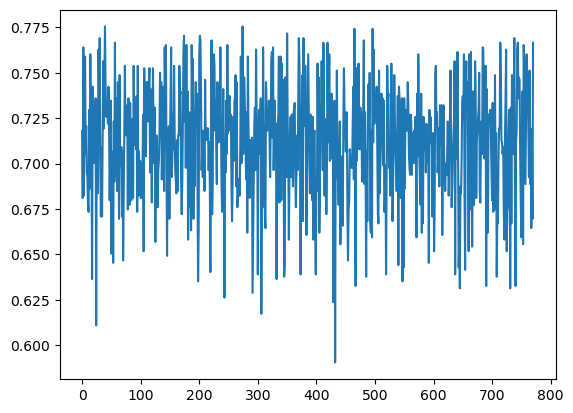

In [11]:
import matplotlib.pyplot as plt

x= list(range(0,len(accur)))

plt.plot(x, accur)
plt.show()
